In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import json

[nltk_data] Downloading package stopwords to /Users/tommy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os

import numpy as nrc_py
import pandas as pnl_data
from pandas import *
import sklearn

In [3]:
import random
skipped = random.sample(range(1, 1226258), 1164945)

In [4]:
# Downsize the dataset to the first 50K headlines (~5% samples)
# 1226258 x 0.95 =~ 1164945

In [5]:
print(len(skipped))
print(type(skipped))

1164945
<class 'list'>


In [6]:
def read_data_from_csv(path):

    assert os.path.exists(path), f'File not found: {path}!'
    assert os.path.splitext(path)[
        -1] == '.csv', f'Unsupported file type {os.path.splitext(path)[-1]}!'

    data = pnl_data.read_csv(path, skiprows=[i for i in skipped])
    #column_list = data.columns.values.tolist()
    #column_list.remove('publish_date')
    #print(type(data))
    
    X = data['headline_text'].tolist()
    text = data.headline_text.unique()
    text = text.tolist()
    #print(data.headline_text.unique())
    return X, text

In [7]:
data, text = read_data_from_csv("./abcnews-date-text.csv")
#print(X)

In [8]:
data

['australia to contribute 10 million in aid to iraq',
 'community urged to help homeless youth',
 'girl injured in head on highway crash',
 'govt is to blame for ethanols unpopularity opp',
 'omodei to stay in politics',
 'peace agreement may bring respite for venezuela',
 'public urged to check gas cylinders',
 'restraint order issued against anti discrimination',
 'group airs truancy concerns',
 'hussein says iraq doesnt want war with us',
 'lend leases posts 370 million loss',
 'man charged over roxby downs plane incident',
 'pollock denies split in proteas camp',
 'ruiz hat trick as guatemala rout nicaragua',
 'truck roll destroys furniture',
 'turkey still undecided over us aid for gulf attack',
 'wa wine destined for us',
 'western power reveals power supply bid details',
 'aek shut out malaga to claim goalless draw',
 'allan unlikely to appeal fine',
 'ama airs hospital reform concerns',
 'claim low oil inventory causing high petrol prices',
 'council rejects combined field days

In [9]:
text

['australia to contribute 10 million in aid to iraq',
 'community urged to help homeless youth',
 'girl injured in head on highway crash',
 'govt is to blame for ethanols unpopularity opp',
 'omodei to stay in politics',
 'peace agreement may bring respite for venezuela',
 'public urged to check gas cylinders',
 'restraint order issued against anti discrimination',
 'group airs truancy concerns',
 'hussein says iraq doesnt want war with us',
 'lend leases posts 370 million loss',
 'man charged over roxby downs plane incident',
 'pollock denies split in proteas camp',
 'ruiz hat trick as guatemala rout nicaragua',
 'truck roll destroys furniture',
 'turkey still undecided over us aid for gulf attack',
 'wa wine destined for us',
 'western power reveals power supply bid details',
 'aek shut out malaga to claim goalless draw',
 'allan unlikely to appeal fine',
 'ama airs hospital reform concerns',
 'claim low oil inventory causing high petrol prices',
 'council rejects combined field days

In [10]:
type(data)

list

In [11]:
type(text)

list

In [12]:
print(len(data))
print(len(text))

61313
60646


In [13]:
"""
data = []
for i in range(50000):
    data.append(X[i])
"""

'\ndata = []\nfor i in range(50000):\n    data.append(X[i])\n'

In [14]:
"""
print(type(text))
print(len(data))
print(len(text))
"""

'\nprint(type(text))\nprint(len(data))\nprint(len(text))\n'

In [15]:
#df1 = pd.DataFrame({'document':data})
df = pd.DataFrame({'document':text})

In [16]:
# removing everything except alphabets`
#df1['clean_doc'] = df1['document'].str.replace("[^a-zA-Z#]", " ")
df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-16-93c25a97a138>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")


In [17]:
# removing short words
#df1['clean_doc'] = df1['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [18]:
stop_words = stopwords.words('english')
stop_words.extend(['sa','gns','ua','us','gn','aec','aek', 'ama', 'anz', 'arab', 'nt'])

In [19]:
# tokenization
#tokenized_doc1 = df1['clean_doc'].apply(lambda x: x.split())
tokenized_doc = df['clean_doc'].apply(lambda x: x.split())

In [20]:
# remove stop-words
#tokenized_doc1 = tokenized_doc1.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc)

0                   [australia, contribute, million, iraq]
1                [community, urged, help, homeless, youth]
2                    [girl, injured, head, highway, crash]
3                    [govt, blame, ethanols, unpopularity]
4                                 [omodei, stay, politics]
                               ...                        
60641    [boris, johnson, announces, restrictions, majo...
60642                    [australians, celebrating, years]
60643    [suspected, chinese, submarine, drone, found, ...
60644    [reintroduces, hard, border, victoria, melbour...
60645    [womens, shed, canberra, reskilling, unemploye...
Name: clean_doc, Length: 60646, dtype: object


In [21]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
print(detokenized_doc)

['australia contribute million iraq', 'community urged help homeless youth', 'girl injured head highway crash', 'govt blame ethanols unpopularity', 'omodei stay politics', 'peace agreement bring respite venezuela', 'public urged check cylinders', 'restraint order issued anti discrimination', 'group airs truancy concerns', 'hussein says iraq doesnt want', 'lend leases posts million loss', 'charged roxby downs plane incident', 'pollock denies split proteas camp', 'ruiz trick guatemala rout nicaragua', 'truck roll destroys furniture', 'turkey still undecided gulf attack', 'wine destined', 'western power reveals power supply details', 'shut malaga claim goalless draw', 'allan unlikely appeal fine', 'airs hospital reform concerns', 'claim inventory causing high petrol prices', 'council rejects combined field days stand idea', 'council change tree protection', 'former socceroos coach thomson dies', 'group concerned rain brings wrong impression', 'water sparks boat lake albert', 'coroner clea

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [23]:
vectorizer = TfidfVectorizer(stop_words=stop_words,max_features=10000, max_df = 0.5, use_idf = True, ngram_range=(1,3))

In [24]:
Headline = vectorizer.fit_transform(detokenized_doc)
print(Headline.shape)

(60646, 10000)


In [25]:
Headline

<60646x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 282722 stored elements in Compressed Sparse Row format>

In [26]:
terms = vectorizer.get_feature_names()

In [27]:
terms

['aaron',
 'abalone',
 'abandon',
 'abandoned',
 'abandons',
 'abare',
 'abares',
 'abattoir',
 'abbas',
 'abbot',
 'abbot point',
 'abbott',
 'abbott says',
 'abbotts',
 'abcs',
 'abducted',
 'abduction',
 'abduction attempt',
 'abetz',
 'ability',
 'able',
 'ablett',
 'aboard',
 'aboriginal',
 'aboriginal community',
 'aboriginal corporation',
 'aboriginal health',
 'aboriginal land',
 'aborigines',
 'abortion',
 'abortion clinic',
 'absence',
 'absolutely',
 'abuse',
 'abuse allegations',
 'abuse claims',
 'abuse inquiry',
 'abuse royal',
 'abuse royal commission',
 'abuse victim',
 'abuse victims',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'academic',
 'academy',
 'accc',
 'accc takes',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accessible',
 'accident',
 'accidental',
 'accidents',
 'accommodation',
 'account',
 'accountant',
 'accounting',
 'accounts',
 'accreditation',
 'accusations',
 'accuse',
 'accused',
 'accused assaulting',
 'accused child',
 'accused drug',
 'a

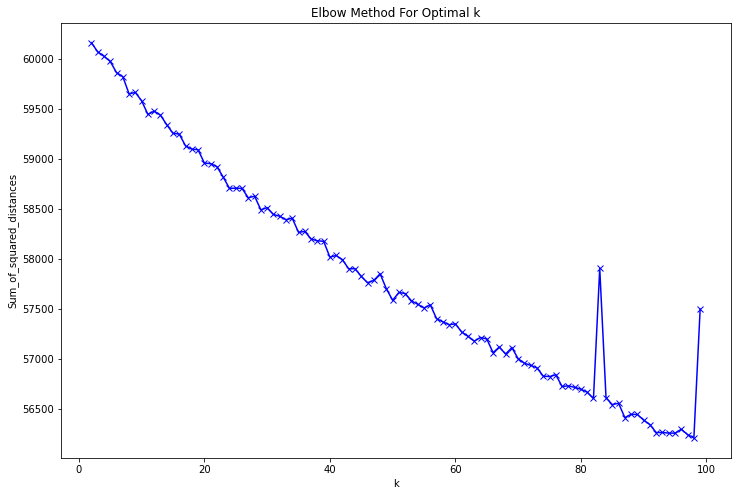

value of K: 
50


In [28]:
Sum_of_squared_distances = []
K = range(2,100)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(Headline)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(12,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print('value of K: ')
true_k = int(input())

In [29]:
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(Headline)

labels=model.labels_.tolist()
#clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
#print(clusters.sort_values(by=['cluster']))

#for i in range(true_k):
#    print(clusters[clusters['cluster'] == i])

In [30]:
clusters=pnl_data.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
print(clusters.sort_values(by=['cluster']))

for i in range(true_k):
    print(clusters[clusters['cluster'] == i])

                                                   title  cluster
60645  womens shed canberra reskilling unemployed pan...        0
55441         jack absalom life of a renaissance bushman        0
55440  women in spain strike on international womens day        0
31117    retailers win right to cut casual shift lengths        0
55439  we're going to feel this in the us and around the        0
...                                                  ...      ...
40865  former pakistan cricketer shoaib malik signs w...       49
7110                     zarqawi group kills allawi aide       49
3193      asia trade deal to improve india pakistan ties       49
11084     scores of militants killed in pakistan clashes       49
26661                pakistan curtails presidents powers       49

[60646 rows x 2 columns]
                                                   title  cluster
2                  girl injured in head on highway crash        0
3         govt is to blame for ethanols unpopulari

In [31]:
from sklearn.utils.extmath import randomized_svd

In [32]:
document_concept, concept_concept, term_concept = randomized_svd(Headline, n_components=true_k, n_iter=100,
                              random_state=122)

In [33]:
term_concept

array([[ 1.42275136e-03,  5.56602668e-05,  8.77595477e-05, ...,
         1.27293934e-04,  9.23354761e-05,  8.75222709e-06],
       [ 1.10195274e-04,  8.27628577e-04,  1.41956973e-03, ...,
         1.77914863e-03,  1.02345919e-03,  1.26444045e-04],
       [ 2.42598038e-04,  1.83581087e-03,  1.56179338e-03, ...,
         5.05273295e-03,  3.60641441e-03,  4.04731717e-04],
       ...,
       [-3.45386469e-04, -1.70869349e-03, -1.09409832e-03, ...,
        -3.76450088e-03,  1.61257809e-03,  1.56240829e-04],
       [-3.23218593e-04,  5.80136803e-04,  2.65463252e-04, ...,
        -3.03402699e-03, -1.14236913e-03, -3.52815558e-05],
       [-5.50443202e-04, -1.86418027e-03, -3.97969208e-04, ...,
        -1.95996416e-03,  2.56026042e-03, -3.10752203e-04]])

In [34]:
#printing the concepts
for i, comp in enumerate(term_concept):
        terms_comp = zip(terms, comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
        print("Concept "+str(i)+": ")
        for t in sorted_terms:
            print(t[0])
        print(" ")

Concept 0: 
interview
extended interview
extended
police
interview michael
 
Concept 1: 
police
court
death
investigate
murder
 
Concept 2: 
says
council
govt
australia
fire
 
Concept 3: 
court
charged
fire
murder
accused
 
Concept 4: 
australia
court
says
south
china
 
Concept 5: 
fire
australia
house
south
house fire
 
Concept 6: 
says
fire
house
charged
house fire
 
Concept 7: 
crash
charged
dies
killed
woman
 
Concept 8: 
council
says
fire
charged
court
 
Concept 9: 
water
crash
court
dies
killed
 
Concept 10: 
charged
water
murder
death
sydney
 
Concept 11: 
coast
gold
gold coast
australian
north
 
Concept 12: 
coast
govt
gold
gold coast
water
 
Concept 13: 
rural
coast
gold
crash
gold coast
 
Concept 14: 
found
missing
search
guilty
rural
 
Concept 15: 
country
hour
country hour
sydney
august
 
Concept 16: 
australian
rural
govt
council
open
 
Concept 17: 
plan
sydney
back
rural
missing
 
Concept 18: 
plan
country
australian
country hour
hour
 
Concept 19: 
change
climate
report


In [35]:
#https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8
#https://stats.stackexchange.com/questions/87950/distortion-function-for-k-means-algorithm

In [36]:
clusters

,title,cluster
0,australia to contribute 10 million in aid to iraq,33
1,community urged to help homeless youth,44
2,girl injured in head on highway crash,0
3,govt is to blame for ethanols unpopularity opp,0
4,omodei to stay in politics,0
...,...,...
60641,boris johnson announces new restrictions for m...,0
60642,how australians are celebrating new years eve ...,45
60643,suspected chinese submarine drone found by ind...,2
60644,wa reintroduces hard border with victoria afte...,34


In [37]:
clusters.to_csv('result.csv', index=False)